In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
import seaborn as sns


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [2]:
df = pd.read_csv('counterfeit_train.csv')
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
df.describe(include='all')

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
count,6818,5652.000000,6818,6818.000000,6818.000000,6818,6818,6818.000000,6818,6818,6818,6818.000000
unique,1557,NaN,10,NaN,NaN,16,2,NaN,4,3,4,NaN
top,RQS74,NaN,Area017,NaN,NaN,Hreplacements,mild,NaN,DownTown,Tier 3,Medium,NaN
freq,9,NaN,760,NaN,NaN,976,4434,NaN,4481,2655,2203,NaN
mean,NaN,14.115057,NaN,1995.836316,151.401518,NaN,NaN,0.079174,NaN,NaN,NaN,2280.583480
std,NaN,4.649668,NaN,8.368979,62.203961,NaN,NaN,0.051481,NaN,NaN,NaN,1693.354404
min,NaN,5.855000,NaN,1983.000000,41.790000,NaN,NaN,0.013000,NaN,NaN,NaN,146.290000
25%,NaN,9.995000,NaN,1985.000000,104.509400,NaN,NaN,0.040058,NaN,NaN,NaN,933.265600
50%,NaN,13.800000,NaN,1997.000000,153.195700,NaN,NaN,0.066955,NaN,NaN,NaN,1902.670400
75%,NaN,18.050000,NaN,2002.000000,196.148350,NaN,NaN,0.107697,NaN,NaN,NaN,3207.638400


In [5]:
df.shape

(6818, 12)

In [6]:
df.isna().sum().sum()

1166

In [7]:
df.nunique()

Medicine_ID            1557
Counterfeit_Weight      414
DistArea_ID              10
Active_Since              9
Medicine_MRP           5097
Medicine_Type            16
SidEffect_Level           2
Availability_rating    6317
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
dtype: int64

In [9]:
df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing']) # It ill tell null values in percentage.
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Counterfeit_Weight,17.1
Medicine_ID,0.0
DistArea_ID,0.0
Active_Since,0.0
Medicine_MRP,0.0
Medicine_Type,0.0
SidEffect_Level,0.0
Availability_rating,0.0
Area_Type,0.0
Area_City_Type,0.0


In [10]:
df['Counterfeit_Weight'] = df['Counterfeit_Weight'].fillna('None')

In [11]:
df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing']) # It ill tell null values in percentage.
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Medicine_ID,0.0
Counterfeit_Weight,0.0
DistArea_ID,0.0
Active_Since,0.0
Medicine_MRP,0.0
Medicine_Type,0.0
SidEffect_Level,0.0
Availability_rating,0.0
Area_Type,0.0
Area_City_Type,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   6818 non-null   object 
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 639.3+ KB


C:\Users\SAP_LAB\AppData\Local\Temp\ipykernel_3488\638595465.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Counterfeit_Sales"]))


<Axes: xlabel='Counterfeit_Sales', ylabel='Density'>

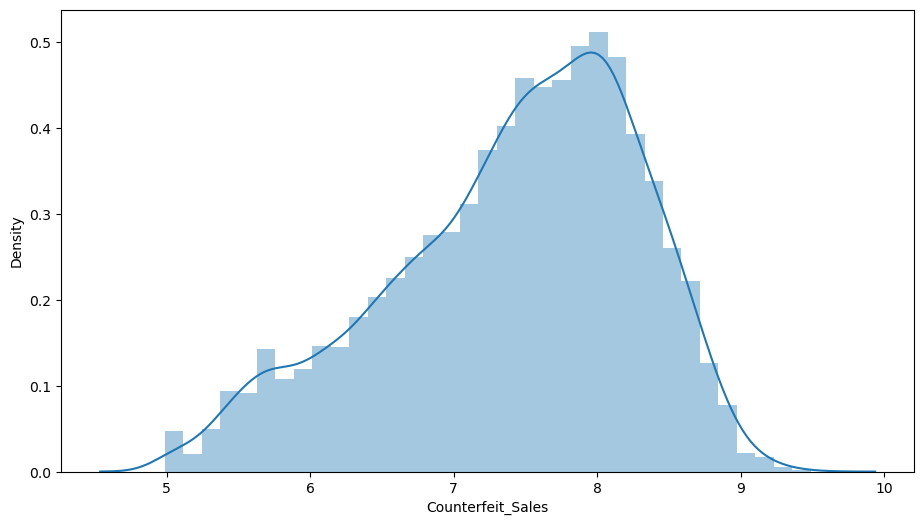

In [16]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(df["Counterfeit_Sales"]))

In [17]:
numeric_data = df.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Active_Since', 'Medicine_MRP', 'Availability_rating',
       'Counterfeit_Sales'],
      dtype='object')

In [18]:
cat_values = df.select_dtypes(include=['object'])
cat_values.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level
0,RRA15,13.1,Area046,Antimalarial,critical,DownTown,Tier 1,Small
1,YVV26,None,Area027,Mstablizers,mild,CityLimits,Tier 3,Medium
2,LJC15,9.025,Area046,Cardiac,mild,DownTown,Tier 1,Small
3,GWC40,11.8,Area046,OralContraceptives,mild,DownTown,Tier 1,Small
4,QMN13,None,Area019,Hreplacements,critical,MidTownResidential,Tier 1,Small


In [19]:
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,Medicine_ID_AAS12,Medicine_ID_ACC80,Medicine_ID_ACW12,Medicine_ID_ADE15,Medicine_ID_ADO13,Medicine_ID_ADT76,Medicine_ID_AEF11,Medicine_ID_AEL80,Medicine_ID_AEN20,Medicine_ID_AEX84,...,Medicine_Type_Tranquilizers,SidEffect_Level_mild,Area_Type_DownTown,Area_Type_Industrial,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Area_dist_level_Small,Area_dist_level_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:

df = df.drop(list(cat_values.columns), axis=1)

In [22]:
df

,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
0,1995,160.2366,0.070422,1775.5026
1,1983,110.4384,0.013000,3069.1520
2,1995,259.4092,0.060783,2603.0920
3,1995,99.9830,0.065555,1101.7130
4,1983,56.4402,0.248859,158.9402
...,...,...,...,...
6813,1995,204.1452,0.112963,2070.4520
6814,1995,235.1088,0.131103,2126.3792
6815,2005,193.6292,0.105096,2119.7212
6816,2000,162.8682,0.099957,1485.2138


In [26]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [29]:
y_train = np.log(df_train.Counterfeit_Sales)
X_train = df_train.drop("Counterfeit_Sales",1)

y_test= np.log(df_test.Counterfeit_Sales)
X_test = df_test.drop("Counterfeit_Sales",1)

C:\Users\SAP_LAB\AppData\Local\Temp\ipykernel_3488\3090840727.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = df_train.drop("Counterfeit_Sales",1)
C:\Users\SAP_LAB\AppData\Local\Temp\ipykernel_3488\3090840727.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = df_test.drop("Counterfeit_Sales",1)


In [42]:
y_train.head()

1657    8.211669
47      6.577692
1088    7.781012
4556    8.168643
591     7.475444
Name: Counterfeit_Sales, dtype: float64

In [52]:
coefficient=[]
intercept=[]
regress_model={}
for i in X_train:
    regr=linear_model.LinearRegression()
    #train_x = np.asanyarray(X_train[[i]])
    #train_y=  np.asanyarray(y_train[['Counterfeit_Sales']])
    regr.fit(X_train, y_train)
    regress_model[i]=regr
    print("Relation between {} & {}".format(i,"Counterfeit_Sales"))
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ',regr.intercept_)
    coefficient.append(regr.coef_)
    intercept.append(regr.intercept_)
    
    print('\n')

Relation between Active_Since & Counterfeit_Sales
Coefficients:  [ 0.05365386  0.46104216 -0.16758955]
Intercept:  7.420377116828171


Relation between Medicine_MRP & Counterfeit_Sales
Coefficients:  [ 0.05365386  0.46104216 -0.16758955]
Intercept:  7.420377116828171


Relation between Availability_rating & Counterfeit_Sales
Coefficients:  [ 0.05365386  0.46104216 -0.16758955]
Intercept:  7.420377116828171




In [54]:
from sklearn.metrics import r2_score

for i in X_train,y_train:
    #test_x = np.asanyarray(test[[i]])
    #test_y = np.asanyarray(test[['COEMISSIONS ']])
    test_y_ = regress_model[i].predict(X_test)
    print("Fitting Error between {} & {}".format(i,"'Counterfeit_Sales'"))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_- y_test)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , y_test) )
    print('\n')

TypeError: unhashable type: 'DataFrame'